In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.constants import *
from scipy.optimize import root
from scipy.integrate import *
#matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True
%matplotlib inline

In [3]:
"""Units________________________________________________________________________________________________________________"""
eV      = 1                                                                                                  #Electron volt
J       = eV / e                                                                                                     #Joule
s       = 1 / (hbar * J)                                                                                            #Second
m       = s / c                                                                                                      #Meter
kg      = J * c**(2)                                                                                             #Kilograms
K       = J * k                                                                                                     #Kelvin

"""Constants____________________________________________________________________________________________________________""" 

G       = value("Newtonian constant of gravitation") * (m**3 / (kg * s**2))                                #Newton constant
M_pl    = value('Planck mass') * kg                                                                            #Planck mass
M_sun   = 1.989e30 * kg                                                                                         #Solar mass
GeV     = 1.0e9 * eV                                                                                    #Giga electron volt
MeV     = 1.0e6 * eV                                                                                    #Mega electron volt
G_f     = value('Fermi coupling constant') * GeV**-2                                                        #Fermi constant
T_CMB   = 2.725 * K                                                                                        #CMB temperature
pc      = 3.085e16 * m                                                                                              #Parsec
kpc     = 1.0e3 * pc                                                                                           #Kilo parsec
Mpc     = 1.0e6 * pc                                                                                           #Mega parsec
km      = 1.0e3 * m                                                                                               #Kilomter
cm      = 1.0e-2 * m                                                                                            #Centimeter
H       = 67.8e3 * (m / s) / Mpc                                                                           #Hubble constant
h_hub   = H / (1.0e5 * (m / s) / Mpc)                                                              #Reduced hubble constant
rho_c   = 1.9e-26 * h_hub**2 * kg / m**3                                                                  #Critical density
zheta_3 = 1.202                                                                              #Zheta funtion with argument 3

[Nesti & Salucci](https://arxiv.org/pdf/1304.5127)

In [4]:
Delta = 18 * np.pi**2
c_vir = 10#20.1
M = 1.0e12 * M_sun
d_gal = 8178 * pc #distance to galactic center

In [5]:
def f_rvir(M):
    return (3 * M / (4 * np.pi * Delta * rho_c))**(1./3)

def f_rs(M):
    return f_rvir(M) / c_vir

def f_rhos(M):
    return M / (4 * np.pi * f_rs(M)**3 * (np.log(1 + c_vir) - c_vir / (1 + c_vir)))

In [6]:
r_s = f_rs(M)
r_vir = f_rvir(M)
rho_s = f_rhos(M)

In [7]:
def rho(r,r_s = r_s,rho_s = rho_s):
    x = r/r_s
    return rho_s / (x * (x+1)**2)

In [8]:
print(f_rhos(M) / GeV * cm**3)
print(f_rvir(M)/kpc)
print(f_rs(M)/kpc)

0.19487555592113343
218.43981992522703
21.843981992522703


In [9]:
def f_rl(l,psi,d=d_gal):
    return np.sqrt(l**2 + d**2 - 2 * d * l * np.cos(psi))

def integrand(l,psi):
    r = f_rl(l,psi)
    return rho(r)**2

def dJdO(psi,d=d_gal):
    l_min = 0
    l_max = 10 * d
    return quad(integrand,l_min,l_max,args=(psi,))

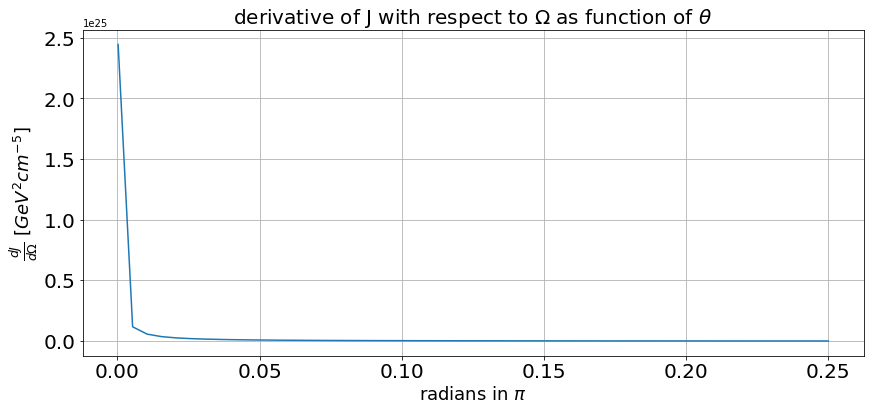

In [34]:
arr_psi=np.linspace(np.pi/3600,np.pi/4)
L_J = []
for psi in arr_psi:
    dJ=dJdO(psi)
    L_J.append(dJ[0])
arr_J = np.asarray(L_J)
# plt.plot(psi_l/np.pi,J*cm**5/GeV**2) deze zijn niet gedefineerd
plt.figure(1,figsize=(14, 6))
plt.plot(arr_psi/np.pi,arr_J*cm**5/GeV**2) # gok dat dit het moet zijn
plt.xlabel(r'radians in $\pi$',fontsize = 18)
plt.ylabel(r'$\frac{dJ}{d\Omega}$ $[GeV^2cm^{-5}]$',fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(r'derivative of J with respect to $\Omega$ as function of $\theta$ ', fontsize=20)
plt.grid(True)
plt.show()

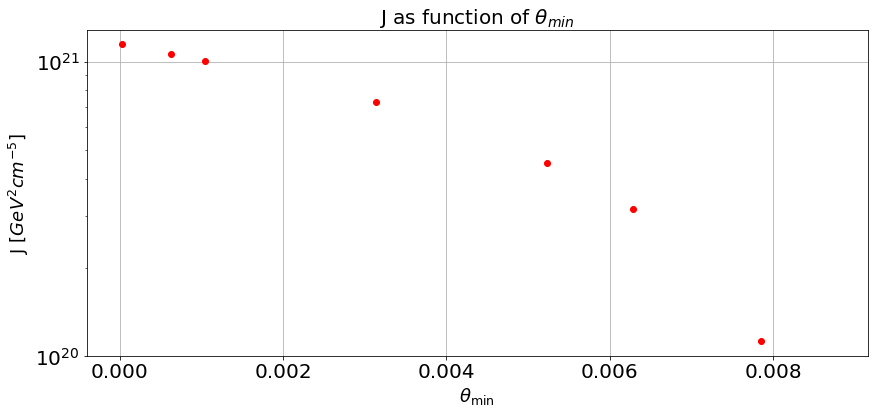

In [31]:
def dJdO_theta(psi,d=d_gal):
    return dJdO(psi)[0] * 2 * np.pi * np.sin(psi)
J_l = []
theta_min = [np.pi / 105000, np.pi / 5000, np.pi / 3000, np.pi / 1000,np.pi/600, np.pi/500, np.pi / 400, np.pi/360]
for angle in theta_min:
    J_l.append(quad(dJdO_theta,angle,np.pi/360)[0]*(cm**5)/(GeV**2))
#J = quad(dJdO_theta,theta_min,np.pi/360)
plt.figure(1,figsize=(14, 6))
plt.semilogy(theta_min, J_l, 'ro')
plt.xlabel(r'$\theta_{\rm min}$',fontsize = 18)
plt.ylabel(r'J $[GeV^2cm^{-5}]$',fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(r'J as function of $\theta_{min}$ ', fontsize=20)
plt.grid(True)
plt.show()

In [12]:
print (np.log(J[0] / M_sun**2 * kpc**5)/np.log(10))

TypeError: 'float' object is not subscriptable

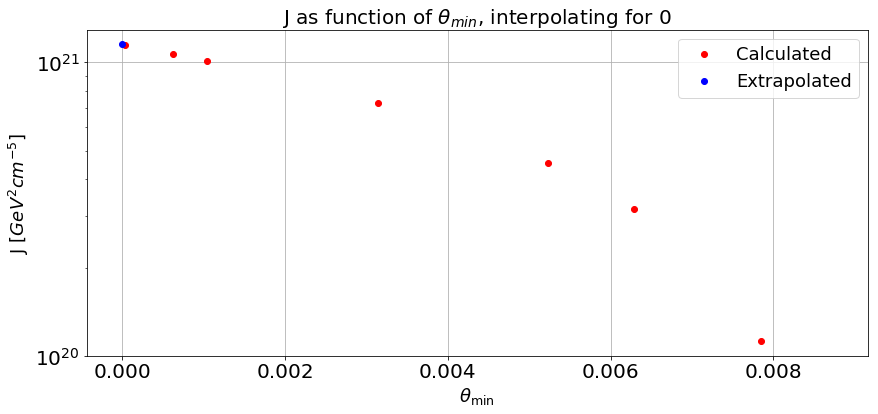

In [30]:
from scipy.interpolate import interp1d
j_func = interp1d(theta_min,J_l,fill_value="extrapolate")
plt.figure(1,figsize=(14, 6))
plt.semilogy(theta_min, J_l, 'ro',label = 'Calculated')
plt.semilogy(0,j_func(0),'bo',label = 'Extrapolated')
plt.xlabel(r'$\theta_{\rm min}$',fontsize = 18)
plt.ylabel(r'J $[GeV^2cm^{-5}]$',fontsize = 18)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(r'J as function of $\theta_{min}$, interpolating for 0 ', fontsize=20)
plt.legend(prop=dict(size=18))
plt.grid(True)